## Сравнение двух средних. t-критерий Стьюдента  
Требования к данным:
* Дисперсии внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий).  
Проверить можно с помощью критерия Левена и критерия Фишера
* Если объем выборки недостаточно большой (меньше 30), то важно соблюдать требование о нормальности распределения двух выборок.  
Если наблюдений больше 30, то t-тест неплохо справляется с поставленной задачей даже если распределение внутри выборок отличается от нормального.

In [1]:
import scipy.stats as st

def p_value_calc(t, n, area='bt'):
    df = n - 1
    return {
        'bt': 2 * (1 - st.t.cdf(abs(t), df)), # both tales
        'lt': st.t.cdf(t, df), # lower tail
        'ut': 1 - st.t.cdf(t, df) # upper tail
           }[area]

### Задача  
Процесс денатурации белка представляет собой разрушение водородных связей между двумя цепями этой молекулы  
и очень сильно зависит от температуры, с которой мы воздействуем на молекулу.  
При сравнении 2 видов в исследовании были получены различия.

In [2]:
mean1 = 89.9
sd1 = 11.3
n1 = 20

mean2 = 80.7
sd2 = 11.7
n2 = 20

H0: M1 = M2  
H1: M1 != M2  

Для начала принимаем за правду факт того, что нулевая гипотеза верна. Если это так, то при многократном повторении нашего эксперимента  
(извлекали выборки и рассчитывали разность между двумя выборочными средними значениями), X1 и X2 распределилась бы симметрично.  
Если бы мы предположили, что на самом деле в ГС два средних равны, то и среднее значение разности этих значений равнялось бы нулю.  
При этом стандартное отклонение (стандартная ошибка) рассчитывалась бы по формуле:

In [3]:
df = n1 + n2 - 2
print('df:', df)

df: 38


Как мы видим, стандартная ошибка среднего для первого среднего и стандартная ошибка для второго среднего вносят свой вклад.  
Даже если мы вычисляем разность между двумя средними значениями, чем больше стандартная ошибка среднего для каждого из них,  
тем больше возможных комбинаций может принять разность между этими средними значениями и тем больше будет вариативность такого показателя.

При достаточно большом кол-ве наблюдений мы могли бы сказать, что распределение разности между двумя средними значениями приняло бы нормальный вид,  
что будет правдой в соответствии с ЦПТ. Еще более точно будет сказать, что такое распределение будет соответствовать Т-распределению  
с числом степеней свобод, которое рассчитывается по след формуле:

In [4]:
se = (sd1 ** 2 / n1 + sd2 ** 2 / n2) ** 0.5
print('se:', se)

se: 3.6371692289471493


Основываясь на этой информации, мы можем рассчитать, насколько далеко конкретно наша разность между двумя средними отклонилась  
от предполагаемого показателя ГС, тем самым рассчитать вероятность получить такие же или еще более выраженные отклонения при условии что на самом деле верна H0

In [5]:
t = (mean1 - mean2) / se
print('t:', t)

t: 2.529439633102561


Рассчитав соответствующее t значение и зная число степеней свободы, мы можем рассчитать соответствующий р-уровень значимости,  
который скажет нам какая вероятность получить такое или еще более выраженное отличие между 2 средними, если на деле верна нулевая гипотеза.

In [6]:
p_value = p_value_calc(t, df)
print('p_value:', p_value)

alpha = 0.05

if p_value > alpha:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) < alpha. Reject H0')

p_value: 0.015815754660169823
p_value(X < 2.53 or X > 2.53) < alpha. Reject H0


In [7]:
print('Парный t-тест scipy.stats: ', st.ttest_ind_from_stats(mean1, sd1, n1, mean2, sd2, n2, equal_var=True, alternative='two-sided'))

# st.ttest_ind(array1, array2)

Парный t-тест scipy.stats:  Ttest_indResult(statistic=2.529439633102561, pvalue=0.0156935300771004)


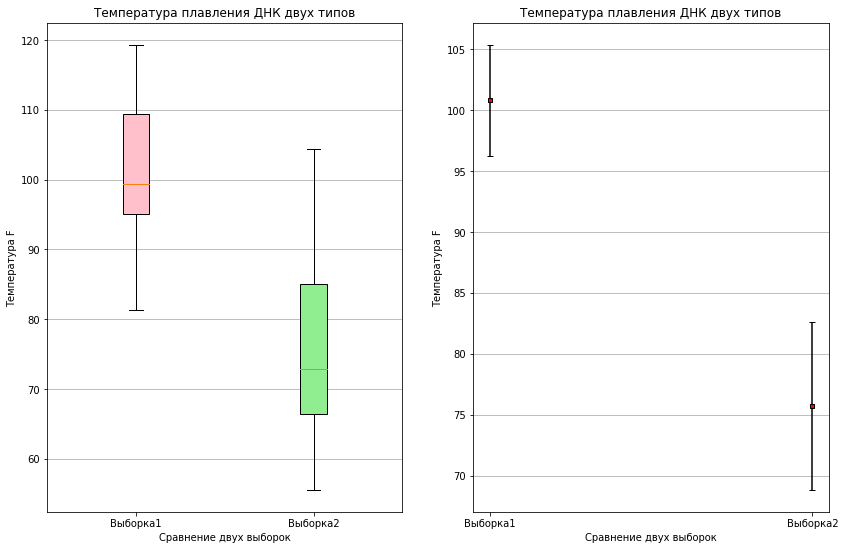

Парный t тест scipy.stats:  Ttest_indResult(statistic=6.04781958789892, pvalue=4.894702897415829e-07)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

df = pd.DataFrame({'Выборка1': array1, 'Выборка2': array2}).agg(['mean', 'std', 'count', 'sem']).transpose()
df.columns = ['Mx', 'SD', 'N', 'SE']

p = 0.95
K = st.t.ppf((1 + p) / 2, df['Mx'] - 1)
df['interval'] = K * df['SE']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

bplot1 = ax1.boxplot([array1, array2],
                     vert=True, 
                     patch_artist=True,
                     labels=['Выборка1', 'Выборка2'])

bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

print('Парный t тест scipy.stats: ', st.ttest_ind(array1, array2))
## scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')[source]

### Задача
Ожидается, что добавление специальных веществ уменьшит жесткость воды. По оценке жесткости воды до после добавления специальных веществ по 40-ка и 50-ти  
пробам соответственно получим средние значения жесткости (в стандартных единицах),  равные 4,0 и 0,8. Дисперсия измерений в обоих случаях предполагается равна 0,25.  
Подтверждают ли эти результаты ожидаемый эффект? Принять α = 0,05. Контролируемая величина имеет нормальное распределение.

In [9]:
n1 = 40
mean1 = 4.0

n2 = 50
mean2 = 0.8

sd = 0.25 ** 0.5

# H0: M1 = M2
# H1: M1 != M2
alpha = 0.05

se = (sd ** 2 / n1 + sd ** 2 / n2) ** 0.5

t = (mean1 - mean2) / se
print('t:', t)

df = n1 + n2 - 2
p_value = p_value_calc(t, df)
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) < alpha. Reject H0')

t: 30.16988933062603
p_value: 0.0
p_value(X < 30.17 or X > 30.17) < alpha. Reject H0


In [10]:
se1 = sd / n1 ** 0.5
print('Доверительный интервал для 1-го набора измерений', st.t.interval(0.95, n1 - 1, loc=mean1, scale=se1))

se2 = sd / n2 ** 0.5
print('Доверительный интервал для 2-го набора измерений', st.t.interval(0.95, n2 - 1, loc=mean2, scale=se2))

Доверительный интервал для 1-го набора измерений (3.8400922429098916, 4.159907757090108)
Доверительный интервал для 2-го набора измерений (0.6579015724388134, 0.9420984275611867)


In [11]:
print('Парный t тест scipy.stats: ', st.ttest_ind_from_stats(mean1, sd, n1, mean2, sd, n2, equal_var=True, alternative='two-sided'))

Парный t тест scipy.stats:  Ttest_indResult(statistic=30.16988933062603, pvalue=3.461615558926927e-48)


### Задача  
Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929.  
Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин).   
Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами  
и актерами  статистически достоверными.
Средний возраст мужчин равен 45, sd = 9.
Средний возраст женщин равен 34, sd = 10.

In [12]:
mean_man = 45
sd_man = 9

mean_woman = 34
sd_woman = 10

n = 100

# H0: M1 = M2
# H1: M1 != M2
alpha = 0.05

t_test_results = st.ttest_ind_from_stats(mean_man, sd_man, n, mean_woman, sd_woman, n, equal_var=True, alternative='two-sided')

t = t_test_results.statistic
print('t:', t)

p_value = t_test_results.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t:.2f} or X > {t:.2f}) < alpha. Reject H0')

t: 8.176235608718828
p_value: 3.455544014290269e-14
p_value(X < 8.18 or X > 8.18) < alpha. Reject H0


In [13]:
se1 = sd_man / n ** 0.5
print('Доверительный интервал для лучших актёров', st.t.interval(0.95, n - 1, loc=mean_man, scale=se1))

se2 = sd_woman / n ** 0.5
print('Доверительный интервал для лучших актрис', st.t.interval(0.95, n - 1, loc=mean_woman, scale=se2))

Доверительный интервал для лучших актёров (43.214204743642185, 46.785795256357815)
Доверительный интервал для лучших актрис (32.015783048491315, 35.984216951508685)


## Непараметрический аналог t-критерию Стьюдента — U-критерий Манна-Уитни  
Почему отклонения от нормального распределения могут негативно повлиять на результаты исследования?  
Выбросы – экстремально высокие или экстремально низкие значения. Представьте, что мы добавим  
очень маленькое наблюдение в 1 выборку, и очень большое во 2. На боксплоте и на QQ plot мы бы заметили,  
что максимальное значение в выборке слишком максимально для нормального (слишком далеко отклонилось от среднего значения).  

Всего два значения уничтожат все значимые результаты: Т-критерий Стьюдента скажет, что вероятность  
получить такие или еще более выраженные различия составит 97%, нулевую гипотезу мы отклонить не сможем.  
Если распределение признака отличается от нормального, можно использовать непараметрический аналог –  
U-критерий Манна-Уитни. Он переводит все данные в ранговую шкалу (ранжирует показатели температуры от 1 до последнего),  
после этого считает какой средний ранг оказался в первой группе и какой во второй.  
Этот критерий менее чувствителен к экстремальным отклонениям от нормальности и наличию выбросов.

Разумно применять вместо t - теста:  
* Распределения хотя бы в одной из выборок значительно отличается от нормального. 
* Есть заметные выбросы в данных. 
* В некоторых задачах мощность теста даже выше, чем t критерия  
(например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении).  

Неразумно применять:  
* Выборки разного размера, с различным направлением асимметрии.  

### Задача 
Результаты тестирования по 30-бальной шкале для группы X и группы Y представлены в таблице.  
Сравнить эффективность двух методов обучения студентов в двух группах для уровня статистической значимости 5%

In [14]:
import numpy as np

sample1 = [18, 10, 7, 15, 14, 11, 13]
sample2 = [15, 20, 10, 8, 16, 10, 19, 7, 15, 14, 29]

# H0: M1 = M2
# H1: M1 != M2
alpha = 0.05

test_results = st.mannwhitneyu(sample1, sample2)

u = test_results.statistic
print('u:', u)

p_value = test_results.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {u:.2f} or X > {u:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {u:.2f} or X > {u:.2f}) < alpha. Reject H0')

u: 30.0
p_value: 0.23321461069836286
p_value(X < 30.00 or X > 30.00) > alpha. Do not reject H0
